In [147]:
import numpy as np
import os
import glob
import numpy as np
import matplotlib.pyplot as plt


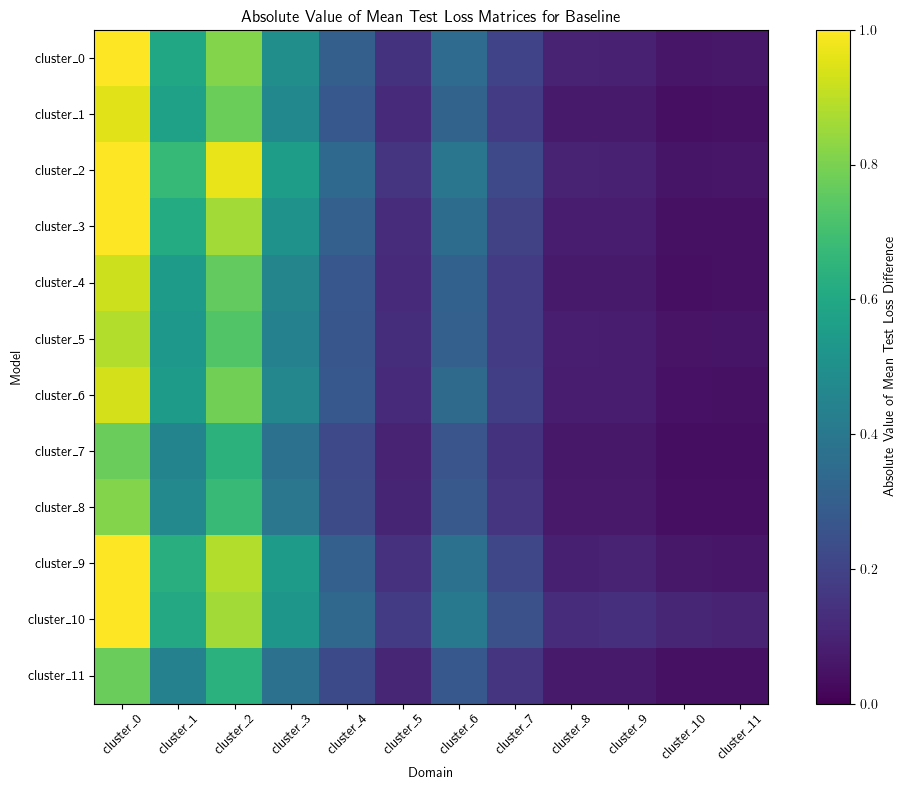

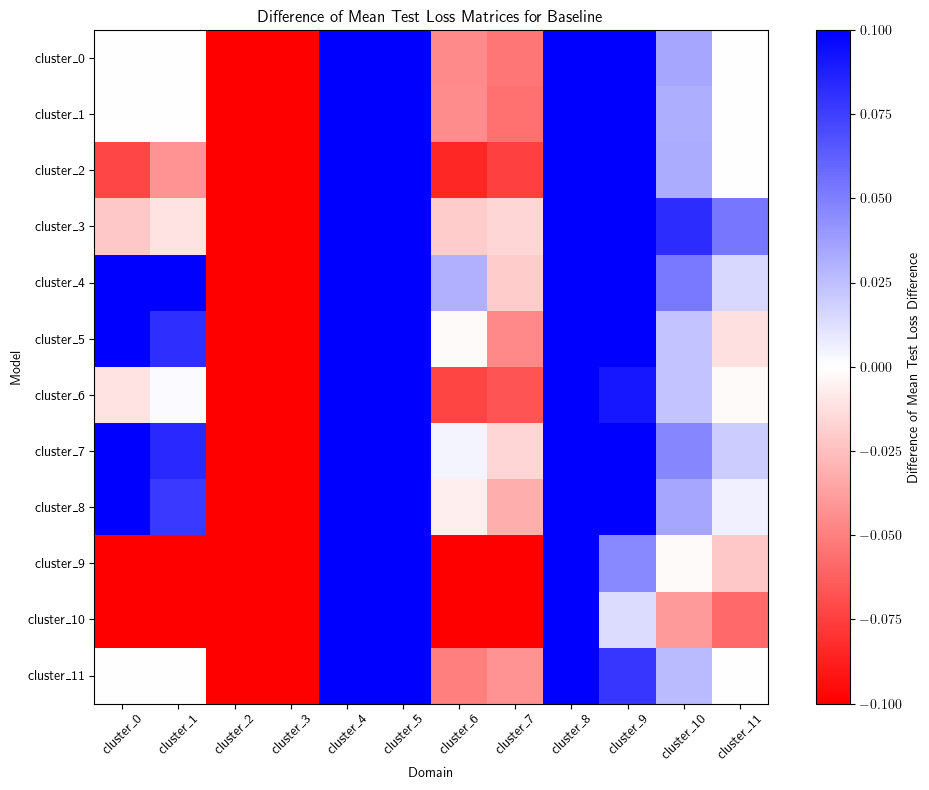

Experiment: dibo
Mean diagonal MSE: 0.3551516252639131
Consistency metric: -0.028681338701248


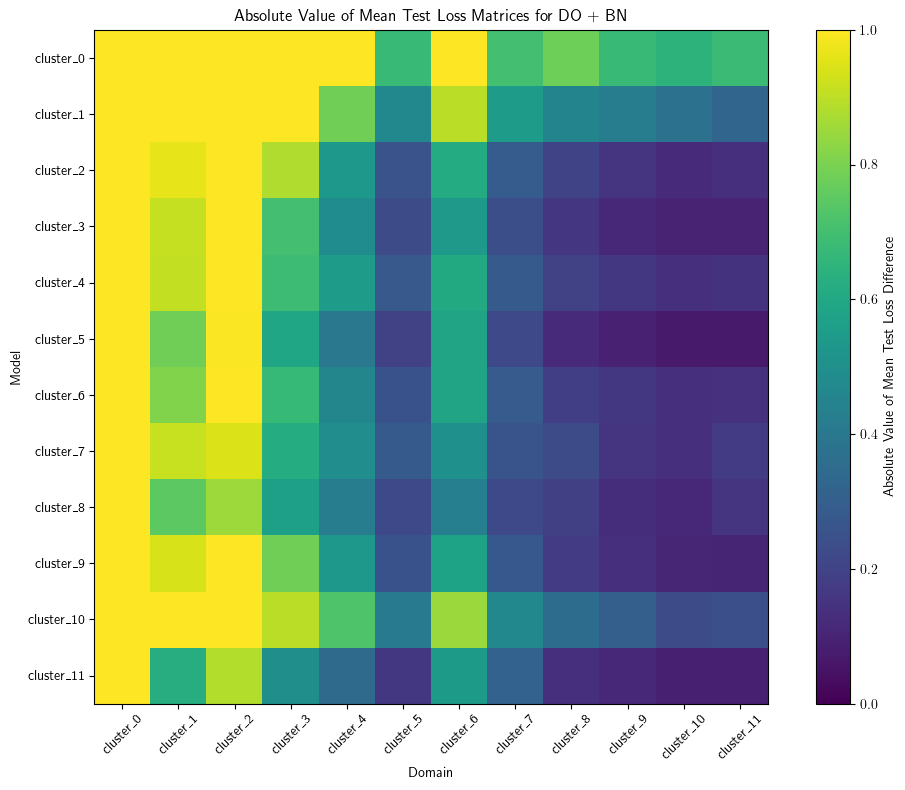

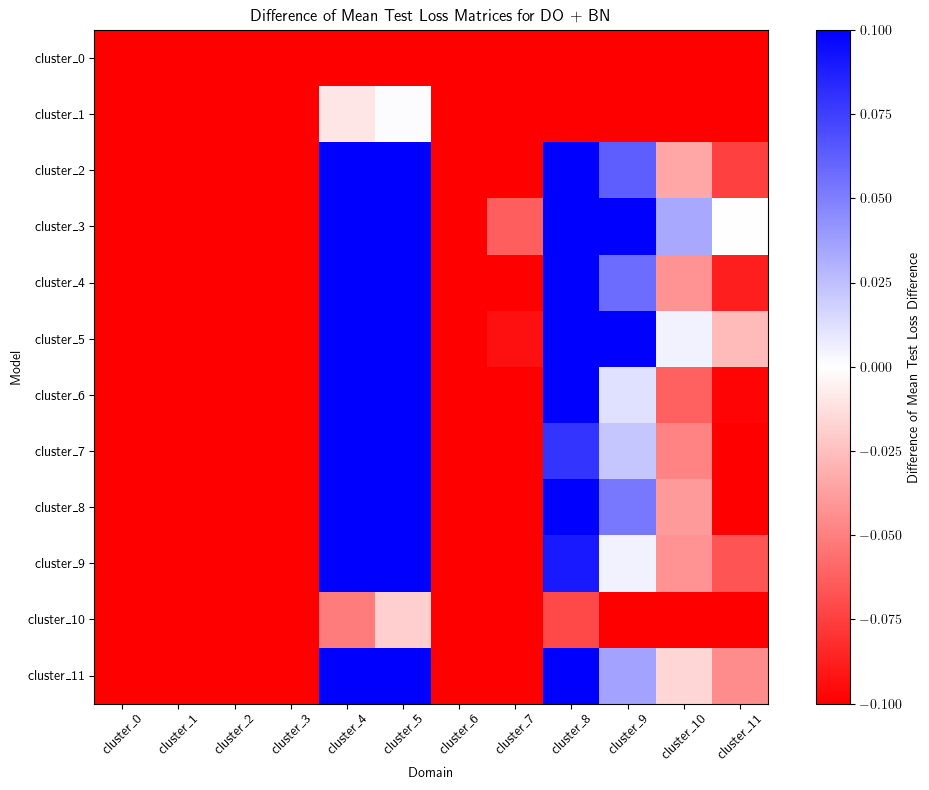

Experiment: atbv
Mean diagonal MSE: 0.6528480953112613
Consistency metric: -0.05707580783710765


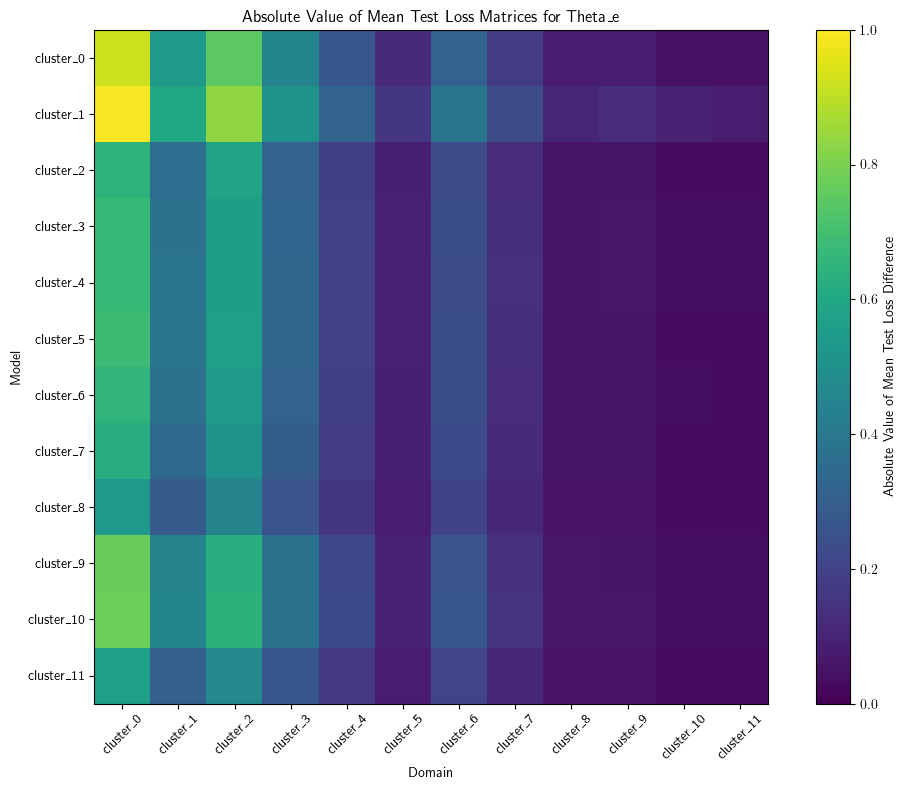

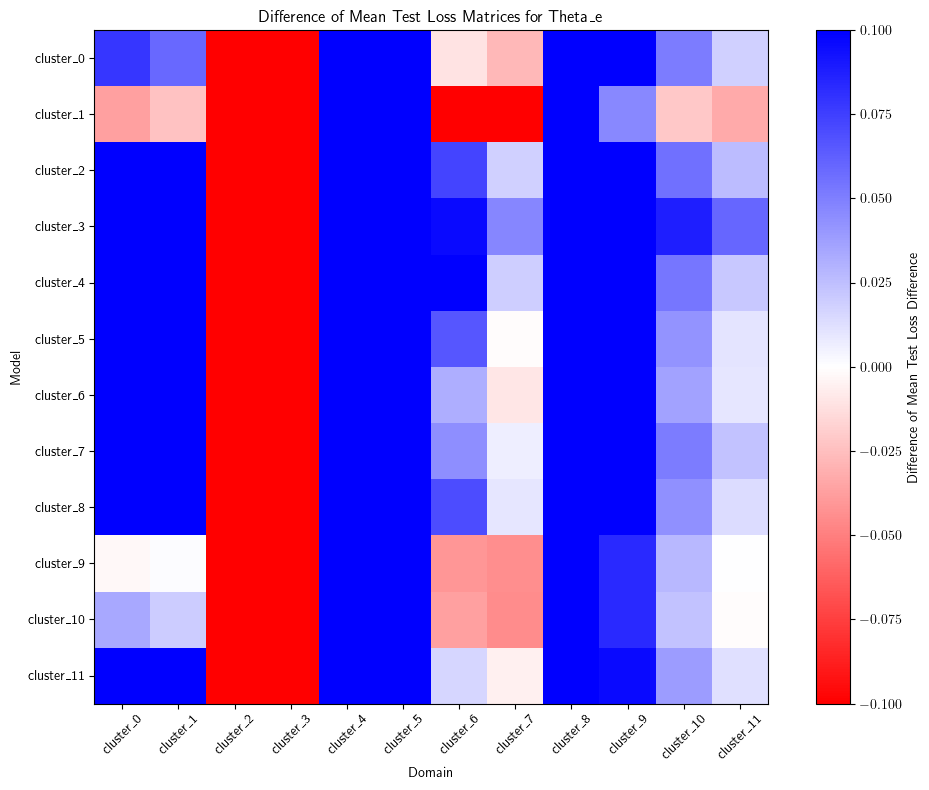

Experiment: vmu4
Mean diagonal MSE: 0.2727116217068927
Consistency metric: -0.02758536411976971


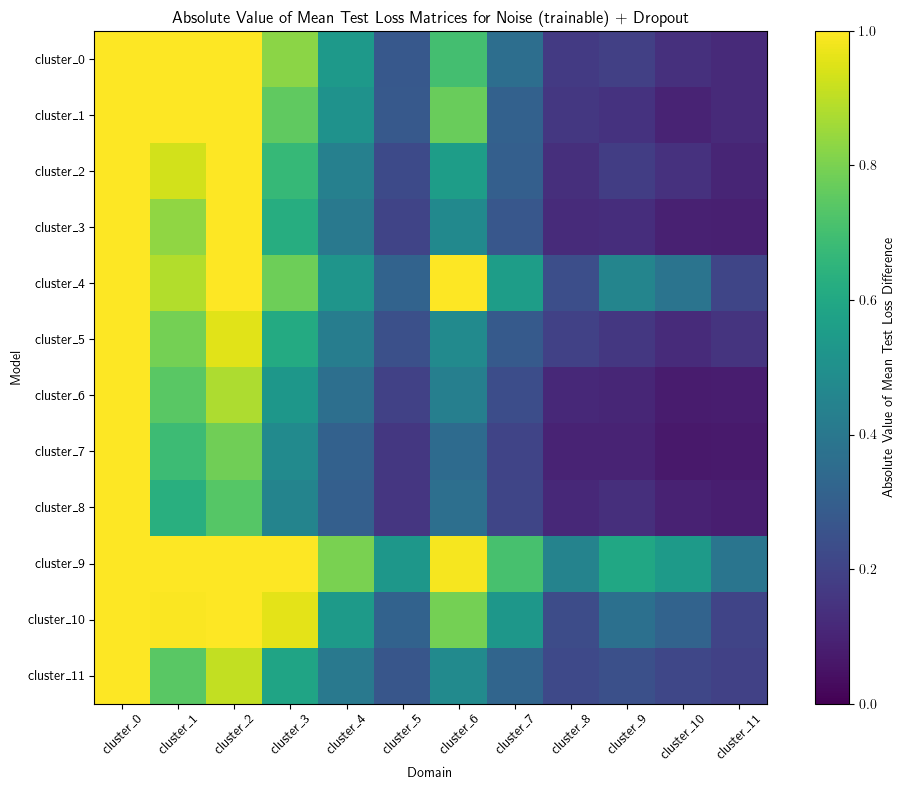

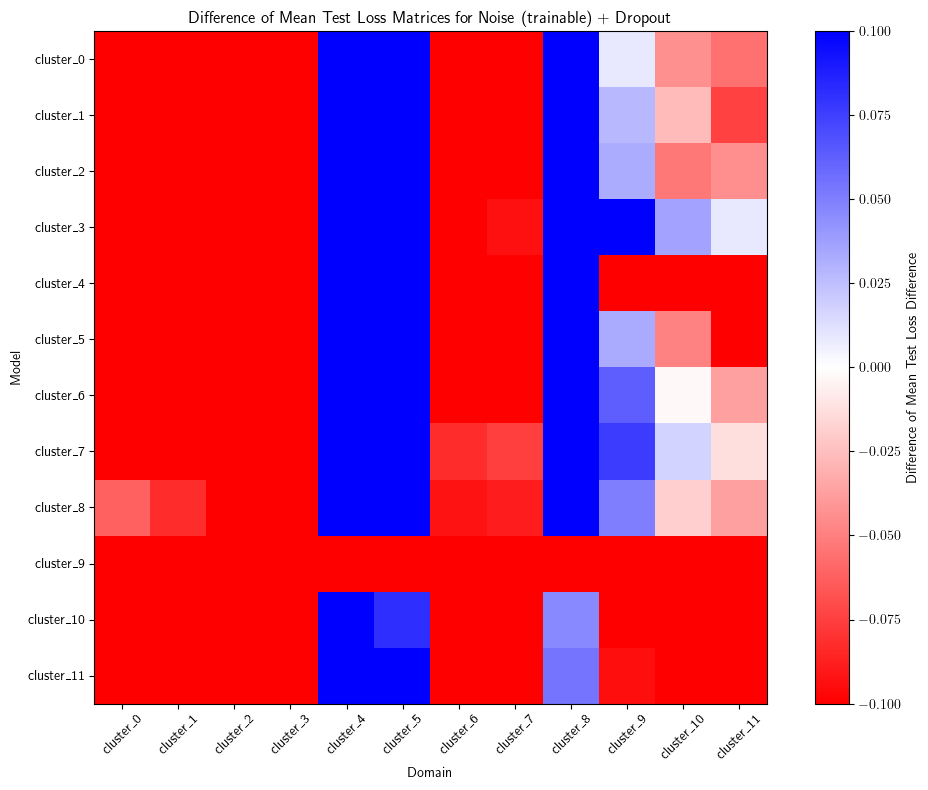

Experiment: 15bu
Mean diagonal MSE: 0.6359302377889394
Consistency metric: -0.08176178944407134


In [181]:
import numpy as np

# "bc8k", "Batch Normalization + Dropout"

# experiments = ["756x", "bi4y", "ofwe", "t9pq"]
experiments = ["dibo", "atbv", "vmu4", "15bu"]
labels = ["Baseline", "DO + BN", "Theta_e", "Noise (trainable) + Dropout"]
# labels = ["Dropout", "DO + BN", "Baseline", "Noise (trainable) + Dropout"]
# labels = [" ", " ", " ", " "]

dataloaders = {
    "cluster_0": [],
    "cluster_1": [],
    "cluster_2": [],
    "cluster_3": [],
    "cluster_4": [],
    "cluster_5": [],
    "cluster_6": [],
    "cluster_7": [],
    "cluster_8": [],
    "cluster_9": [],
    "cluster_10": [],
    "cluster_11": [],
}

consistency_list = []
mean_diagonal_list = []
# Load the .npz file
# data = np.load(f"/Users/fquareng/experiments/new_dataset_12/UNet_experiments_12/ofwe/mean_test_loss_matrix.npz")
data = np.load(f"/Users/fquareng/experiments/cross_val/dibo/mean_test_loss_matrix.npz")
mean_test_loss_baseline = data["arr_0"]
for exp, l in zip(experiments, labels):
    data = np.load(f"/Users/fquareng/experiments/cross_val/{exp}/mean_test_loss_matrix.npz")
    mean_test_loss = data["arr_0"]  # Adjust key if needed

    arr = mean_test_loss.copy()
    cols_to_move = arr[:, [2, 3]].copy()
    mean_test_loss[:, 2:9] = mean_test_loss[:, 4:11]
    mean_test_loss[:, 9:11] = cols_to_move

    rows_to_move = mean_test_loss[[2, 3], :].copy()
    mean_test_loss[2:9, :] = mean_test_loss[4:11, :]
    mean_test_loss[9:11, :] = rows_to_move


    # Plot the difference matrix
    plt.figure(figsize=(10, 8))
    plt.imshow(np.abs(mean_test_loss), cmap='viridis', interpolation='nearest')
    plt.title(f"Absolute Value of Mean Test Loss Matrices for {l}")
    plt.xlabel("Domain")
    plt.ylabel("Model")
    plt.xticks(np.arange(len(dataloaders)), list(dataloaders.keys()), rotation=45)
    plt.yticks(np.arange(len(dataloaders)), list(dataloaders.keys()))
    plt.tight_layout()
    # fix colo
    plt.clim(0, 1)
    plt.colorbar(label='Absolute Value of Mean Test Loss Difference')
    plt.show()

    # Plot the difference matrix
    plt.figure(figsize=(10, 8))
    plt.imshow(mean_test_loss_baseline - mean_test_loss, cmap='bwr_r', interpolation='nearest')
    plt.title(f"Difference of Mean Test Loss Matrices for {l}")
    plt.xlabel("Domain")
    plt.ylabel("Model")
    plt.xticks(np.arange(len(dataloaders)), list(dataloaders.keys()), rotation=45)
    plt.yticks(np.arange(len(dataloaders)), list(dataloaders.keys()))
    plt.tight_layout()
    # fix colo
    plt.clim(-.1, .1)
    plt.colorbar(label='Difference of Mean Test Loss Difference')
    plt.show()

    # Ensure it's a square matrix (clusters x clusters)
    assert mean_test_loss.shape[0] == mean_test_loss.shape[1], "Matrix must be square"
    N = mean_test_loss.shape[0]

    # 1. Compute the mean of the diagonal (same cluster train-test)
    mean_diagonal = np.mean(np.diag(mean_test_loss))

    # 2. Compute the mean difference for each column
    sum_differences = []
    for i in range(mean_test_loss.shape[1]):
        column_values = mean_test_loss[:, i]
        diff = column_values - column_values[i]  # Difference from the diagonal value
        sum_diff = np.sum(np.delete(diff, i))  # Exclude the diagonal element
        sum_differences.append(sum_diff)

    # Convert to a NumPy array for easy handling
    consistency = 1/(N*(N-1))*np.sum(np.array(sum_differences))

    # Print results
    print(f"Experiment: {exp}")
    print(f"Mean diagonal MSE: {mean_diagonal}")
    print(f"Consistency metric: {consistency}")
    
    consistency_list.append(consistency)
    mean_diagonal_list.append(mean_diagonal)


In [182]:
mean_linear_loss = []
mean_quadratic_loss = []
mean_cubic_loss = []
for i in range(12):
    try:
        data = np.load(f"/Users/fquareng/experiments/new_dataset_12/UNet_experiments_12/linear/cluster_{i}/evaluation/cluster_{i}_test_losses.npy")
        mean_linear_loss.append(np.mean(data))
        data = np.load(f"/Users/fquareng/experiments/new_dataset_12/UNet_experiments_12/quadratic/cluster_{i}/evaluation/cluster_{i}_test_losses.npy")
        mean_quadratic_loss.append(np.mean(data))
        data = np.load(f"/Users/fquareng/experiments/new_dataset_12/UNet_experiments_12/cubic/cluster_{i}/evaluation/cluster_{i}_test_losses.npy")
        mean_cubic_loss.append(np.mean(data))
    except:
        print(f"File not found for cluster {i}")
linear_mse = np.mean(mean_linear_loss)
quadratic_mse = np.mean(mean_quadratic_loss)
cubic_mse = np.mean(mean_cubic_loss)

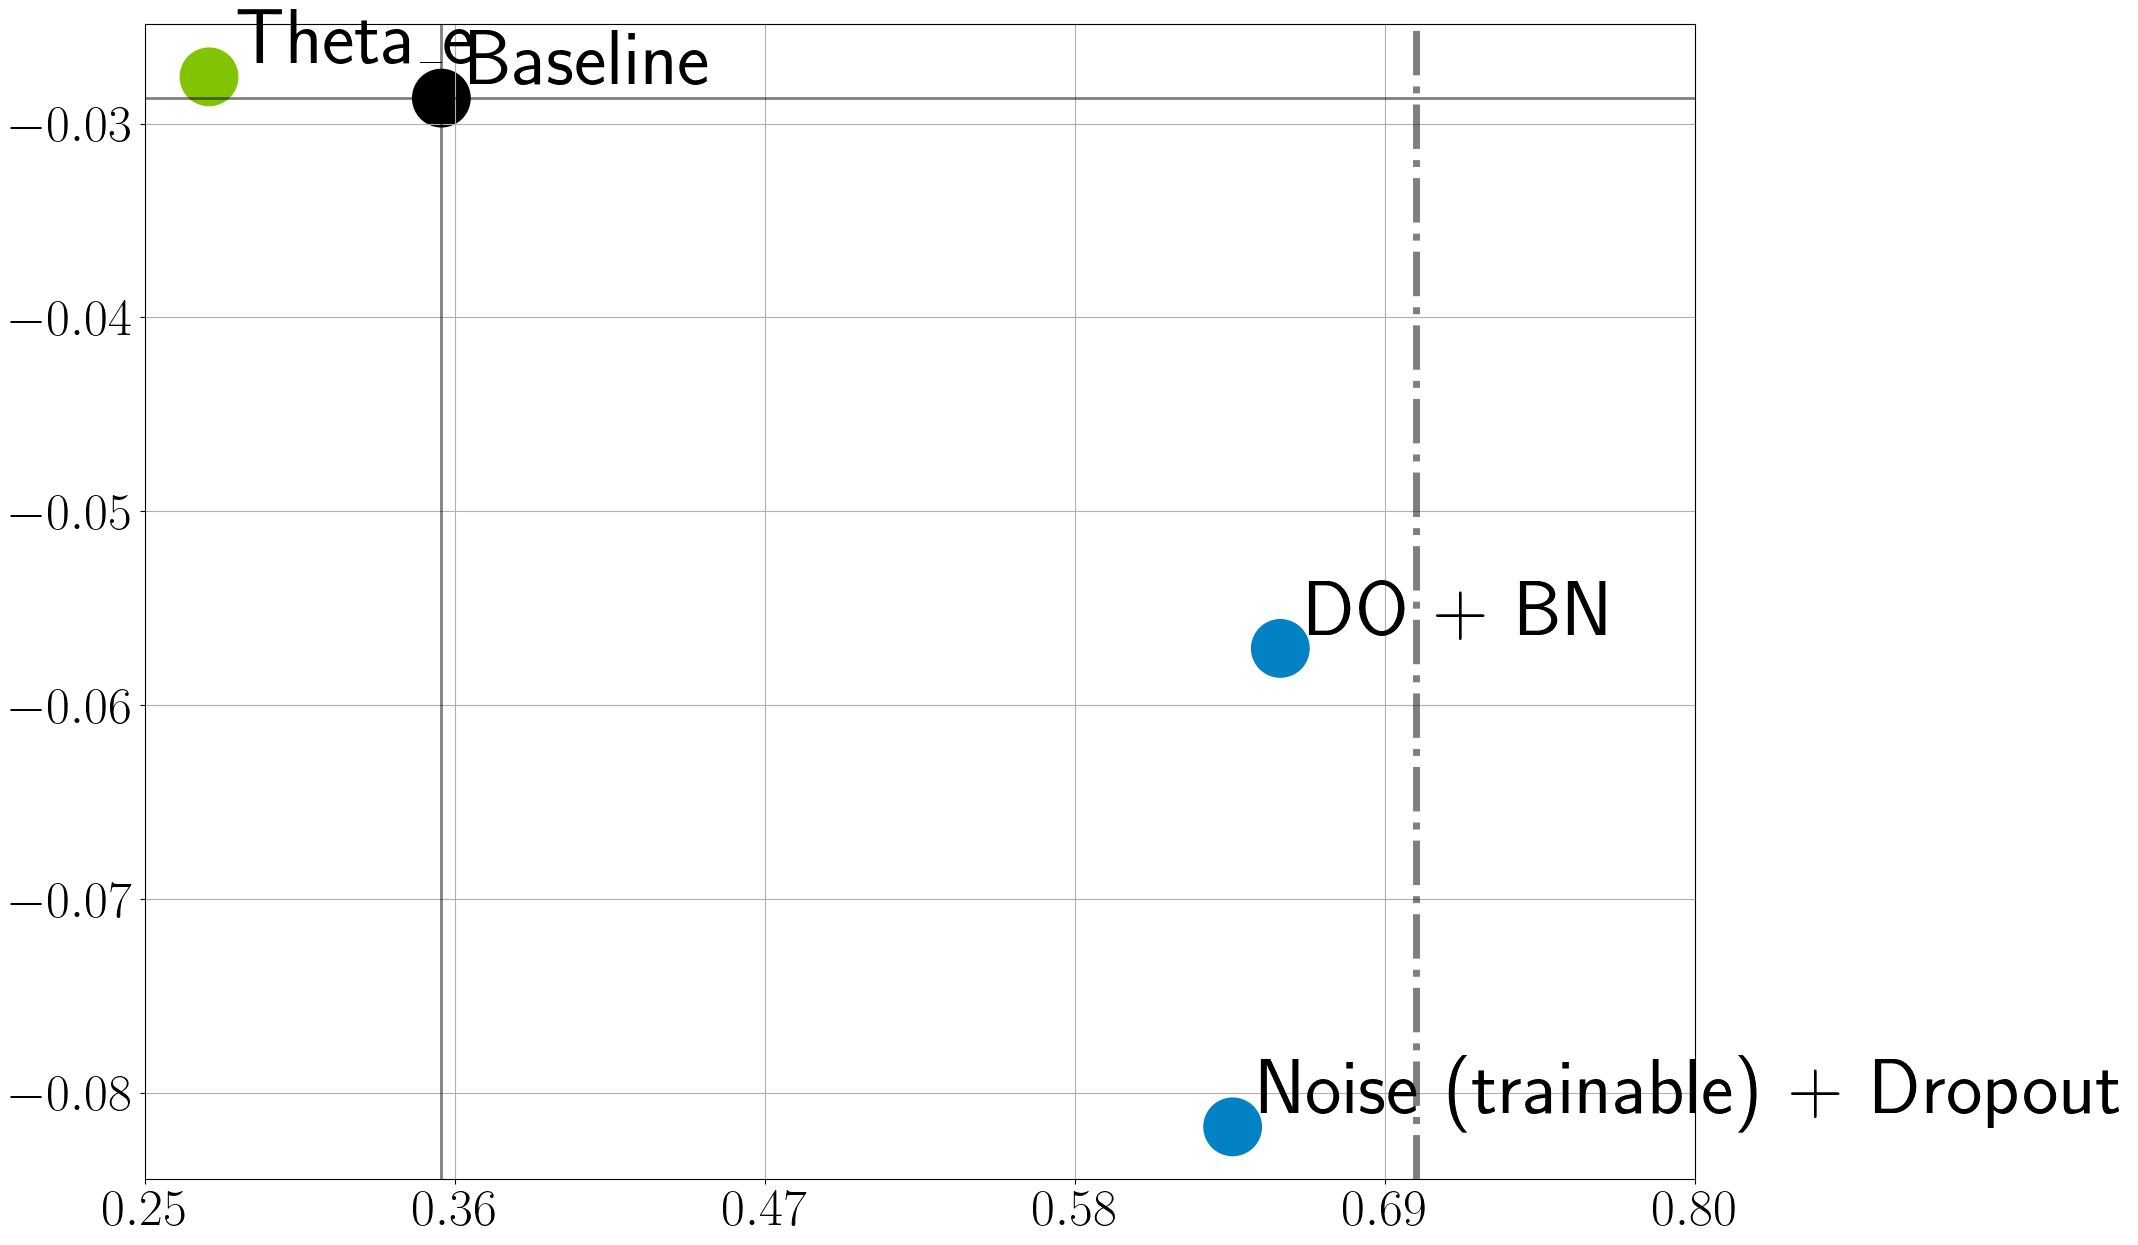

In [183]:
# Plotting
import matplotlib.patches as patches
plt.rcParams['text.usetex'] = True
f = 56

# Plot setup
fig, ax = plt.subplots(figsize=(20, 15))

green = "#82C302"
orange = "#C34301"
yellow = "#C3A403"
red =  "#C4001F"
blue = "#0281C4"

# Set different colors for each point
c = ['k' if i == 0 else green if i == 2 else blue for i in range(len(mean_diagonal_list))]

# Add vertical and horizontal reference lines
ax.axvline(mean_diagonal_list[0], color='k', linestyle='-', linewidth=2, alpha=0.5)
ax.axhline(consistency_list[0], color='k', linestyle='-', linewidth=2, alpha=0.5)

# Color region of the plot correctly
# rect_1 = patches.Rectangle((0, 0), mean_diagonal_list[2], consistency_list[2], color=green, alpha=.5)
# rect_2 = patches.Rectangle((mean_diagonal_list[2], 0), 1, consistency_list[2], color=yellow, alpha=0.5)
# rect_3 = patches.Rectangle((mean_diagonal_list[2], consistency_list[2]), 1, 1, color=red, alpha=.5)
# rect_4 = patches.Rectangle((0, consistency_list[2]), mean_diagonal_list[2], 1, color=yellow, alpha=0.5)
# ax.add_patch(rect_1)
# ax.add_patch(rect_2)
# ax.add_patch(rect_3)
# ax.add_patch(rect_4)

# Add vertical lines for different MSE values
ax.axvline(linear_mse, color='black', linestyle='-.', linewidth=5, alpha=0.5, label='Interpolation')
# ax.axvline(quadratic_mse, color='black', linestyle='-', linewidth=5, alpha=0.5, label='Quadratic')
# ax.axvline(cubic_mse, color='black', linestyle=':', linewidth=5, alpha=0.5, label='Cubic')

# Scatter plot
ax.scatter(mean_diagonal_list, consistency_list, color=c, s=500, alpha=1, marker='o', linewidth=20)
# ax.scatter(mean_diagonal_list, consistency_list, color=c, s=50, alpha=1)

# Labels and grid
# ax.set_title('Pareto plot', fontsize=f)
# ax.set_xlabel('MSE Unseen (K)', fontsize=f, color='grey')
# ax.set_ylabel('C (K)', fontsize=f, color='grey')
ax.grid(True)
ax.set_xticks(np.linspace(0.25, 0.8, 6))
#ax.set_yticks(np.linspace(0, 0.008, 6))
plt.xticks(fontsize=f/1.5, c='k')
plt.yticks(fontsize=f/1.5, c='k')
ax.set_xlim(0.25, 0.8)
# ax.set_ylim(0, 0.008)
# ax.legend(loc="upper right", fontsize=f/1.5, frameon=True, handlelength=2.5, handleheight=0.5, labelspacing=0.4)

# Add labels for each point
for i, txt in enumerate(labels):
    ax.annotate(txt, (mean_diagonal_list[i], consistency_list[i]), fontsize=f, 
                textcoords="offset points", xytext=(20, 10), ha='left')
    
fig.patch.set_alpha(0)

In [ ]:
n_clusters = 8  # Total clusters
base_path = "/Users/fquareng/experiments/"

metrics = {}

for exclude_cluster in range(n_clusters):  # Each iteration excludes a different cluster
    try:
        print(f"Cluster {exclude_cluster}")
        
        # Initialize the dictionary for the current exclude_cluster
        metrics[exclude_cluster] = {}

        # Try to find the experiment path for the excluded cluster
        pattern = os.path.join(base_path, f"*cluster_{exclude_cluster}*")  # Adjust wildcard usage
        exp_paths = glob.glob(pattern)
        
        if exp_paths:
            exp_path = exp_paths[0]
            mean_mse = np.mean(np.load(os.path.join(exp_path, f"cluster_{exclude_cluster}_test_losses.npy")))
            metrics[exclude_cluster]["mse"] = mean_mse
            print(f"Cluster {exclude_cluster} MSE: {mean_mse}")
        else:
            print(f"No data found for cluster {exclude_cluster}.")
            continue
        
        # List to store mean MSEs for all other clusters (excluding current one)
        list_mean_mse = []
        for i in range(n_clusters):
            if i != exclude_cluster:
                try:
                    # Use glob to match directories/files dynamically
                    pattern = os.path.join(base_path, f"*cluster_{i}*")
                    exp_paths = glob.glob(pattern)
                    
                    if exp_paths:
                        exp_path = exp_paths[0]
                        mean_mse = np.mean(np.load(os.path.join(exp_path, f"cluster_{i}_test_losses.npy")))
                        list_mean_mse.append(mean_mse)
                    else:
                        print(f"No data found for cluster {i}.")
                except Exception as e:
                    print(f"Error with cluster {i}: {e}")

        if list_mean_mse:
            mean_consistency = np.mean(np.array(list_mean_mse))
            metrics[exclude_cluster]["Error"] = mean_consistency
            print(f"Cluster {exclude_cluster} consistency error: {mean_consistency}")
    
    except Exception as e:
        print(f"Skipping cluster {exclude_cluster} due to error: {e}")

Cluster 0
Cluster 0 MSE: 0.8857764153825965
No data found for cluster 4.
Cluster 0 consistency error: 1.034546462912763
Cluster 1
Cluster 1 MSE: 1.8296449970310698
No data found for cluster 4.
Cluster 1 consistency error: 0.8772350326380175
Cluster 2
Cluster 2 MSE: 0.27571903274197973
No data found for cluster 4.
Cluster 2 consistency error: 1.1362226933528659
Cluster 3
Cluster 3 MSE: 1.3798066048284032
No data found for cluster 4.
Cluster 3 consistency error: 0.9522080980051286
Cluster 4
No data found for cluster 4.
Cluster 5
Cluster 5 MSE: 0.8112482665787483
No data found for cluster 4.
Cluster 5 consistency error: 1.046967821046738
Cluster 6
Cluster 6 MSE: 0.17303313102602644
No data found for cluster 4.
Cluster 6 consistency error: 1.153337010305525
Cluster 7
Cluster 7 MSE: 1.7378267452703509
No data found for cluster 4.
Cluster 7 consistency error: 0.8925380745981375


Processing: /Users/fquareng/experiments/953m (all_incomplete 2)/cluster_0_test_losses.npy
Processing: /Users/fquareng/experiments/953m (all_incomplete 2)/cluster_1_test_losses.npy
Processing: /Users/fquareng/experiments/953m (all_incomplete 2)/cluster_2_test_losses.npy
Processing: /Users/fquareng/experiments/953m (all_incomplete 2)/cluster_3_test_losses.npy
Processing: /Users/fquareng/experiments/953m (all_incomplete 2)/cluster_5_test_losses.npy
Processing: /Users/fquareng/experiments/953m (all_incomplete 2)/cluster_6_test_losses.npy
Processing: /Users/fquareng/experiments/953m (all_incomplete 2)/cluster_7_test_losses.npy

Final Metrics:
{'step1': {'Error': np.float64(0.43875561592660794), 'mse': np.float64(0.3983772779222925)}}


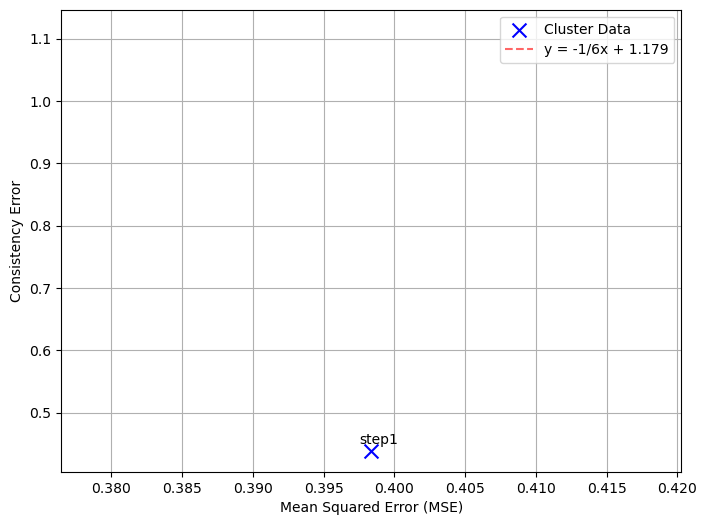

In [147]:


# Define base path
base_path = "/Users/fquareng/experiments/"

# Search for experiment folder
pattern = os.path.join(base_path, "*all_incomplete 2*")
exp_paths = glob.glob(pattern)

if not exp_paths:
    raise FileNotFoundError(f"No experiment folder matching pattern: {pattern}")

exp_path = exp_paths[0]  # Use first match

# Initialize metrics dictionary
metrics = {'step1': {"Error": None, "mse": None}}

# Load overall MSE for all clusters
loss_file = os.path.join(exp_path, "all_clusters_test_losses.npy")
if not os.path.exists(loss_file):
    raise FileNotFoundError(f"File not found: {loss_file}")

metrics['step1']["mse"] = np.mean(np.load(loss_file))

# Define the cluster to exclude
exclude_cluster = 4
hist_mean_loss_per_cluster = []

# Process each cluster except the excluded one
for i in range(n_clusters):
    if i == exclude_cluster:
        continue
    
    # Search for cluster-specific test loss file
    pattern = os.path.join(exp_path, f"*cluster_{i}_test_losses.npy")
    loss_files = glob.glob(pattern)
    
    if not loss_files:
        print(f"Warning: No test loss file found for cluster {i}. Skipping...")
        continue
    
    loss_file_path = loss_files[0]
    print(f"Processing: {loss_file_path}")
    
    # Compute mean loss for this cluster
    mean_loss_per_cluster = np.mean(np.load(loss_file_path))
    hist_mean_loss_per_cluster.append(mean_loss_per_cluster)

# Compute and store the mean error across all included clusters
if hist_mean_loss_per_cluster:
    metrics['step1']["Error"] = np.mean(hist_mean_loss_per_cluster)

# Print final metrics
print("\nFinal Metrics:")
print(metrics)

# Extract MSE and Error values from the metrics dictionary
mse_values = [data["mse"] for data in metrics.values() if "mse" in data and "Error" in data]
error_values = [data["Error"] for data in metrics.values() if "mse" in data and "Error" in data]
clusters = [str(cluster) for cluster in metrics.keys() if "mse" in metrics[cluster] and "Error" in metrics[cluster]]

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(mse_values, error_values, color='b', label='Cluster Data', alpha=1, marker='x', s=100)

# Plot trend line using NumPy for efficiency
x_vals = np.linspace(min(mse_values), max(mse_values), 100)
y_vals = -1/6 * x_vals + 1.179
plt.plot(x_vals, y_vals, label="y = -1/6x + 1.179", linestyle="--", color="r", alpha=0.6)

# Add labels and title
plt.xlabel('Mean Squared Error (MSE)')
plt.ylabel('Consistency Error')
plt.grid(True)

# Annotate each cluster
for i, cluster in enumerate(clusters):
    try:
        plt.annotate(cluster, (mse_values[i], error_values[i]), textcoords="offset points", xytext=(5, 5), ha='center')
    except Exception as e:
        print(f"Skipping annotation for cluster {cluster} due to error: {e}")

plt.legend()
plt.show()

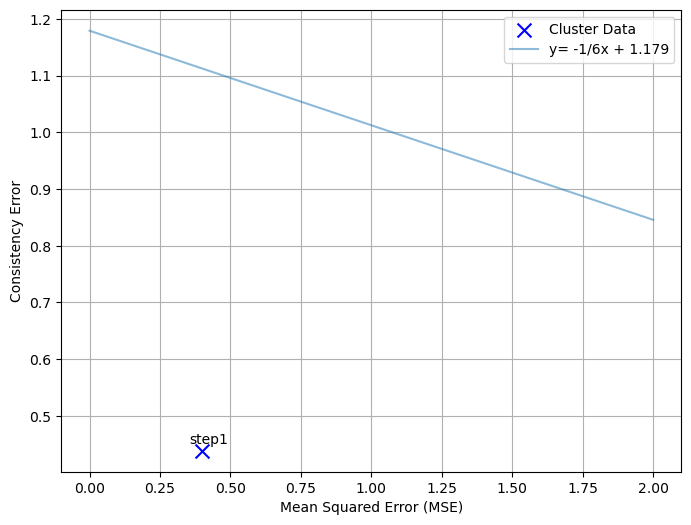

In [148]:
import matplotlib.pyplot as plt

# Assuming 'metrics' is the dictionary you populated in the previous part of the code
mse_values = []
error_values = []

# Extract MSE and Error values
for cluster, data in metrics.items():
    if "mse" in data and "Error" in data:
        mse_values.append(data["mse"])
        error_values.append(data["Error"])

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(mse_values, error_values, color='b', label='Cluster Data', alpha=1, marker='x', s=100)
plt.plot(list(range(3)), [-1/6*e+1.179 for e in range(3)], label="y= -1/6x + 1.179", alpha=.5)

# Adding labels and title
plt.xlabel('Mean Squared Error (MSE)')
plt.ylabel('Consistency Error')
plt.grid(True)

# Optional: Adding annotations for each cluster
for cluster, data in metrics.items():
    try:
        plt.annotate(f"{cluster}", (data['mse'], data['Error']), textcoords="offset points", xytext=(5, 5), ha='center')
    except:
        print(f"Excluding cluster {cluster}")
# Show the plot
plt.legend()
plt.show()

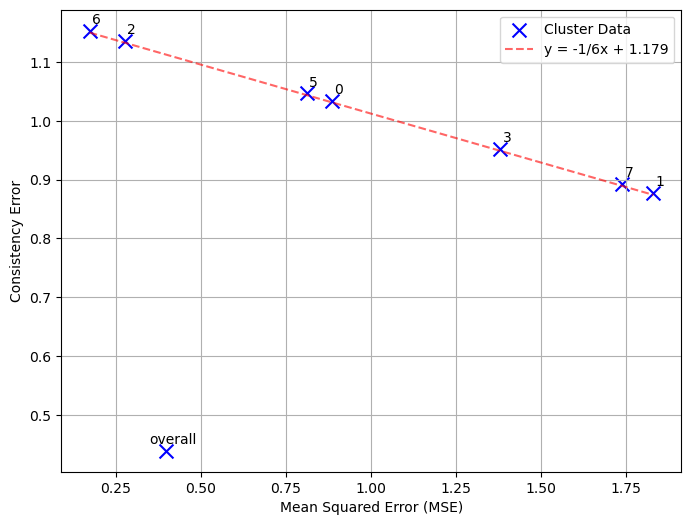

In [93]:
pattern = os.path.join(base_path, f"*(all_incomplete 2)*")  # Adjust wildcard usage
exp_path = glob.glob(pattern)[0]
metrics['step1'] = {}
metrics['step1']["Error"] = {}
metrics['step1']["mse"] = np.mean(np.load(os.path.join(exp_path, "all_clusters_test_losses.npy")))

exclude_cluster = 4

hist_mean_loss_per_cluster = []
for i in range(n_clusters):
    if i != exclude_cluster:
        pattern = os.path.join(str(exp_path), f"*cluster_{i}_test_losses.npy*")  # Adjust wildcard usage
        new_path = glob.glob(pattern)[0]
        print(pattern)
        mean_loss_per_cluster = np.mean(np.load(new_path))
        hist_mean_loss_per_cluster.append(mean_loss_per_cluster)
metrics['step1']["Error"] = np.mean(np.array(hist_mean_loss_per_cluster))

/Users/fquareng/experiments/953m (all_incomplete 2)/*cluster_0_test_losses.npy*
/Users/fquareng/experiments/953m (all_incomplete 2)/*cluster_1_test_losses.npy*
/Users/fquareng/experiments/953m (all_incomplete 2)/*cluster_2_test_losses.npy*
/Users/fquareng/experiments/953m (all_incomplete 2)/*cluster_3_test_losses.npy*
/Users/fquareng/experiments/953m (all_incomplete 2)/*cluster_5_test_losses.npy*
/Users/fquareng/experiments/953m (all_incomplete 2)/*cluster_6_test_losses.npy*
/Users/fquareng/experiments/953m (all_incomplete 2)/*cluster_7_test_losses.npy*


Processing Cluster 0 (excluded)
Cluster 0 MSE: 0.8857764153825965
Cluster 0 Consistency Error: 1.034546462912763
Processing Cluster 1 (excluded)
Cluster 1 MSE: 1.8296449970310698
Cluster 1 Consistency Error: 0.8772350326380175
Processing Cluster 2 (excluded)
Cluster 2 MSE: 0.27571903274197973
Cluster 2 Consistency Error: 1.1362226933528659
Processing Cluster 3 (excluded)
Cluster 3 MSE: 1.3798066048284032
Cluster 3 Consistency Error: 0.9522080980051286
Processing Cluster 4 (excluded)
Processing Cluster 5 (excluded)
Cluster 5 MSE: 0.8112482665787483
Cluster 5 Consistency Error: 1.046967821046738
Processing Cluster 6 (excluded)
Cluster 6 MSE: 0.17303313102602644
Cluster 6 Consistency Error: 1.153337010305525
Processing Cluster 7 (excluded)
Cluster 7 MSE: 1.7378267452703509
Cluster 7 Consistency Error: 0.8925380745981375

Final Metrics:
{0: {'mse': np.float64(0.8857764153825965), 'Error': np.float64(1.034546462912763)}, 1: {'mse': np.float64(1.8296449970310698), 'Error': np.float64(0.87723

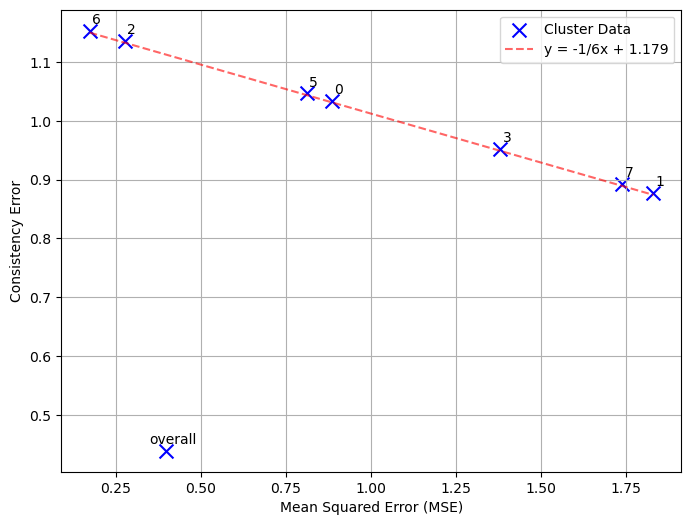

In [149]:
import os
import glob
import numpy as np

# Define base path
base_path = "/Users/fquareng/experiments/"
n_clusters = 8  # Total number of clusters

# Initialize metrics dictionary
metrics = {}

# Iterate over clusters, each time excluding one
for exclude_cluster in range(n_clusters):
    try:
        print(f"Processing Cluster {exclude_cluster} (excluded)")

        # Initialize the dictionary for this exclusion step
        metrics[exclude_cluster] = {}

        # Locate the excluded cluster's test loss file
        pattern = os.path.join(base_path, f"*cluster_{exclude_cluster}*")
        exp_paths = glob.glob(pattern)

        if not exp_paths:
            print(f"Warning: No data found for excluded cluster {exclude_cluster}. Skipping...")
            continue

        exp_path = exp_paths[0]
        mse_file = os.path.join(exp_path, f"cluster_{exclude_cluster}_test_losses.npy")

        if os.path.exists(mse_file):
            mean_mse = np.mean(np.load(mse_file))
            metrics[exclude_cluster]["mse"] = mean_mse
            print(f"Cluster {exclude_cluster} MSE: {mean_mse}")
        else:
            print(f"Warning: Test loss file missing for cluster {exclude_cluster}.")
            continue

        # Compute consistency error across all other clusters
        list_mean_mse = []
        for i in range(n_clusters):
            if i == exclude_cluster:
                continue

            pattern = os.path.join(base_path, f"*cluster_{i}*")
            exp_paths = glob.glob(pattern)

            if not exp_paths:
                print(f"Warning: No data found for cluster {i}. Skipping...")
                continue

            cluster_path = exp_paths[0]
            loss_file = os.path.join(cluster_path, f"cluster_{i}_test_losses.npy")

            if os.path.exists(loss_file):
                mean_loss_per_cluster = np.mean(np.load(loss_file))
                list_mean_mse.append(mean_loss_per_cluster)
            else:
                print(f"Warning: Test loss file missing for cluster {i}. Skipping...")

        # Compute and store the mean consistency error
        if list_mean_mse:
            metrics[exclude_cluster]["Error"] = np.mean(list_mean_mse)
            print(f"Cluster {exclude_cluster} Consistency Error: {metrics[exclude_cluster]['Error']}")

    except Exception as e:
        print(f"Skipping cluster {exclude_cluster} due to error: {e}")

# **Processing Overall Metrics**
overall_pattern = os.path.join(base_path, "*all_incomplete 2*")
overall_exp_paths = glob.glob(overall_pattern)

if not overall_exp_paths:
    raise FileNotFoundError(f"No experiment folder matching pattern: {overall_pattern}")

overall_exp_path = overall_exp_paths[0]  # Use first match
overall_loss_file = os.path.join(overall_exp_path, "all_clusters_test_losses.npy")

if not os.path.exists(overall_loss_file):
    raise FileNotFoundError(f"File not found: {overall_loss_file}")

# Store overall metrics in a separate key
metrics['overall'] = {
    "mse": np.mean(np.load(overall_loss_file)),
    "Error": None
}

# Compute error by excluding cluster 4
exclude_cluster = 4
hist_mean_loss_per_cluster = []

for i in range(n_clusters):
    if i == exclude_cluster:
        continue

    pattern = os.path.join(overall_exp_path, f"*cluster_{i}_test_losses.npy")
    loss_files = glob.glob(pattern)

    if not loss_files:
        print(f"Warning: No test loss file found for cluster {i}. Skipping...")
        continue

    loss_file_path = loss_files[0]
    mean_loss_per_cluster = np.mean(np.load(loss_file_path))
    hist_mean_loss_per_cluster.append(mean_loss_per_cluster)

if hist_mean_loss_per_cluster:
    metrics['overall']["Error"] = np.mean(hist_mean_loss_per_cluster)

# Print final metrics
print("\nFinal Metrics:")
print(metrics)

import matplotlib.pyplot as plt
import numpy as np

# Extract MSE and Error values from the metrics dictionary
mse_values = [data["mse"] for data in metrics.values() if "mse" in data and "Error" in data]
error_values = [data["Error"] for data in metrics.values() if "mse" in data and "Error" in data]
clusters = [str(cluster) for cluster in metrics.keys() if "mse" in metrics[cluster] and "Error" in metrics[cluster]]

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(mse_values, error_values, color='b', label='Cluster Data', alpha=1, marker='x', s=100)

# Plot trend line using NumPy for efficiency
x_vals = np.linspace(min(mse_values), max(mse_values), 100)
y_vals = -1/6 * x_vals + 1.179
plt.plot(x_vals, y_vals, label="y = -1/6x + 1.179", linestyle="--", color="r", alpha=0.6)

# Add labels and title
plt.xlabel('Mean Squared Error (MSE)')
plt.ylabel('Consistency Error')
plt.grid(True)

# Annotate each cluster
for i, cluster in enumerate(clusters):
    try:
        plt.annotate(cluster, (mse_values[i], error_values[i]), textcoords="offset points", xytext=(5, 5), ha='center')
    except Exception as e:
        print(f"Skipping annotation for cluster {cluster} due to error: {e}")

plt.legend()
plt.show()